<a href="https://colab.research.google.com/github/ehsankarami1358/ehsan/blob/main/Unsupervised_metrics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans,DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [49]:
from sklearn.datasets import load_iris
iris = load_iris()
X=pd.DataFrame(iris.data,columns=iris.feature_names)
y=pd.DataFrame(iris.target)

In [50]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [51]:
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(X_scaled)
kmeans.labels_

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [52]:
dbsscan=DBSCAN(eps=0.5,min_samples=5)
dbsscan.fit(X_scaled)
dbsscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

In [53]:
!pip install scikit-learn
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(X_scaled,kmeans.labels_)
print(silhouette_avg)

0.4798814508199817


In [54]:
silhouette_avg=silhouette_score(X_scaled,dbsscan.labels_)
print(silhouette_avg)

0.35651648142700726


In [55]:
k_values=range(2,10)
# Use a different variable name, like 'silhouette_scores', to store the results
silhouette_scores=[]
for k in k_values:
   model=KMeans(n_clusters=k,random_state=42)
   model.fit(X_scaled)
   labels=model.predict(X_scaled)
   # Now you can correctly call the silhouette_score function
   score=silhouette_score(X_scaled,labels)
   silhouette_scores.append(score)

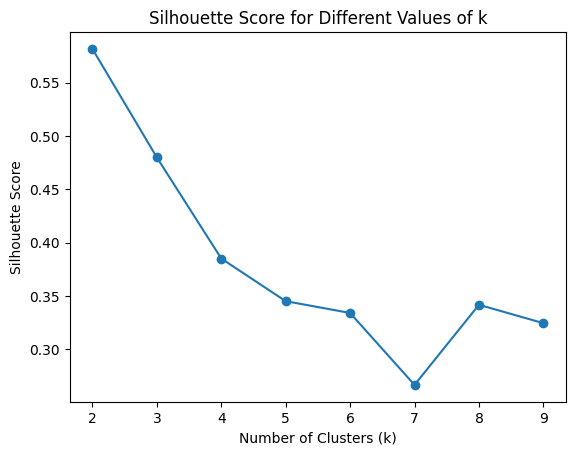

In [56]:
plt.plot(k_values,silhouette_scores,marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()

In [57]:
best_k=k_values[np.argmax(silhouette_scores)]
best_model=KMeans(n_clusters=best_k,random_state=42)
best_model.fit(X_scaled)
best_labels=best_model.predict(X_scaled)

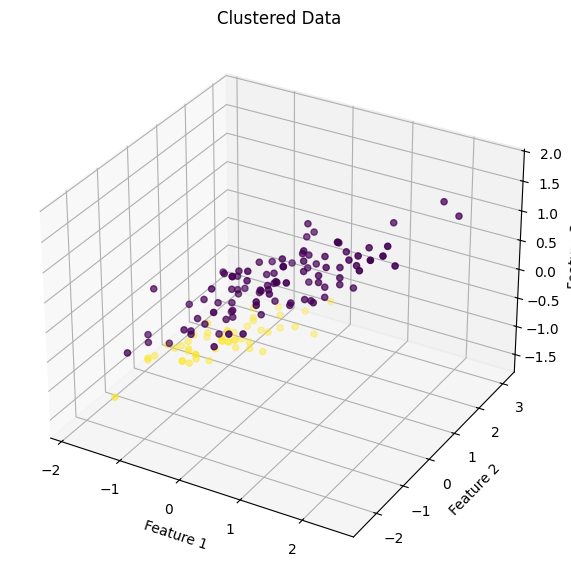

In [58]:
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X_scaled[:,0],X_scaled[:,1],X_scaled[:,2],c=best_labels)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Clustered Data')
plt.show()